In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools
from matplotlib.ticker import ScalarFormatter

In [2]:
df = pd.read_csv('data/2019-nCov stats - China CDC.csv').set_index('time').dropna(how='all')
df.tail(3)

,new confirmed,new confirmed including CD,current confirmed,current confirmed including CD,cum confirmed include clinical,new clinically diagnosed,Hubei clinically diagnosed,new suspected,current suspected,new serious,...,new death from CD,cum death including from clinical,new recovered,cum recovered,current on medical observation,today released,cum on medical observation,Input case,Cumulative Input,Unnamed: 22
time,,,,,,,,,,,,,,,,,,,,,
3/10/2020,NaN,24.0,NaN,16145.0,80778,NaN,NaN,31.0,285.0,-302.0,...,NaN,3158,1578.0,61475,14607.0,3235.0,675886.0,10.0,79.0,NaN
3/11/2020,NaN,15.0,NaN,14831.0,80793,NaN,NaN,33.0,253.0,-235.0,...,NaN,3169,1318.0,62793,13701.0,2206.0,677243.0,6.0,85.0,NaN
3/12/2020,NaN,8.0,NaN,13526.0,80813,NaN,NaN,33.0,147.0,-237.0,...,NaN,3176,1318.0,64111,12161.0,2483.0,678088.0,3.0,88.0,NaN


# Add columns

In [57]:
focus = df.iloc[11:,:12].copy()
focus['cum suspected'] = np.append([np.nan, 393], focus['new suspected'].values[2:] + focus['current suspected'].values[1:-1])
focus['today tested'] = focus['cum suspected'] - focus['current suspected']
# focus['today positive ratio'] = np.append([np.inf], focus['new confirmed'][:-1].values / focus['today tested'][1:].values)

# focus['cum suspected'] = t.cumsum()
# focus['today tested'] = focus['cum suspected'] - focus['current suspected']
# focus['today positive ratio'] = focus['new confirmed'] / focus['today tested']
focus

,new confirmed,new confirmed including CD,current confirmed,cum confirmed including CD,cum confirmed include clinical,current clinically diagnosed,new suspected,current suspected,new serious,current serious,new death including CD,new death from CD,cum suspected,today tested
time,,,,,,,,,,,,,,
1/21/2020,149.0,NaN,NaN,NaN,440.0,NaN,NaN,NaN,NaN,102.0,3.0,NaN,NaN,NaN
1/22/2020,131.0,NaN,NaN,NaN,571.0,NaN,257.0,393.0,NaN,95.0,8.0,NaN,393.0,0.0
1/23/2020,259.0,NaN,NaN,NaN,830.0,NaN,680.0,1072.0,NaN,177.0,8.0,NaN,1073.0,1.0
1/24/2020,444.0,NaN,NaN,NaN,1287.0,NaN,1118.0,1965.0,NaN,237.0,16.0,NaN,2190.0,225.0
1/25/2020,688.0,NaN,NaN,NaN,1975.0,NaN,1309.0,2684.0,87.0,324.0,15.0,NaN,3274.0,590.0
1/26/2020,769.0,NaN,NaN,NaN,2744.0,NaN,3806.0,5794.0,137.0,461.0,24.0,NaN,6490.0,696.0
1/27/2020,1771.0,NaN,NaN,NaN,4515.0,NaN,2077.0,6973.0,515.0,976.0,26.0,NaN,7871.0,898.0
1/28/2020,1459.0,NaN,NaN,NaN,5974.0,NaN,3248.0,9239.0,263.0,1239.0,26.0,NaN,10221.0,982.0
1/29/2020,1737.0,NaN,NaN,NaN,7711.0,NaN,4148.0,12167.0,131.0,1370.0,38.0,NaN,13387.0,1220.0


# The influence of new suspected on new confirmed

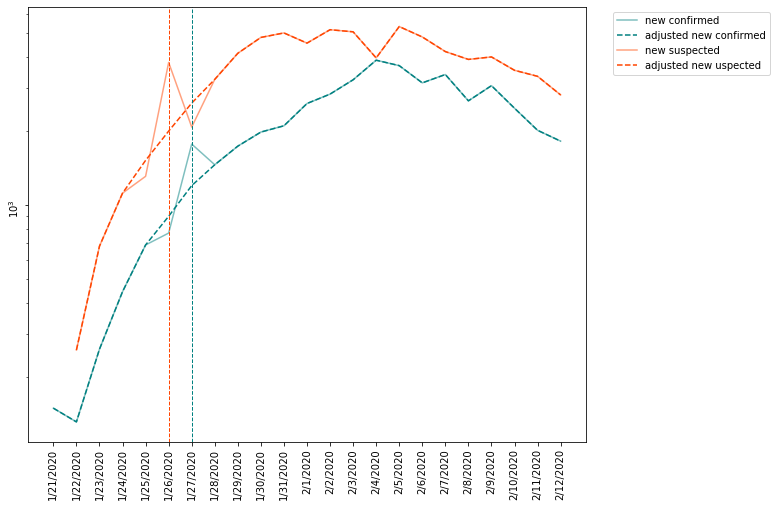

In [62]:
adj = focus.copy()
adj.iloc[4,6] = 1520
adj.iloc[5,6] = 2000
adj.iloc[6,6] = 2600

adj.iloc[5,0] = 900
adj.iloc[6,0] = 1200
# adj.iloc[7,0] = 1500

fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(10,8))

ax.plot(focus.index, focus['new confirmed'], label='new confirmed',c='teal', alpha=0.5)
ax.plot(adj.index, adj['new confirmed'], label='adjusted new confirmed',c='teal',ls='--')
# ax.fill_between(focus.index, focus['cum confirmed'], label='cum confirmed',color='teal', alpha=0.2)

ax.plot(focus.index, focus['new suspected'], label='new suspected', c='orangered', alpha=0.5)
ax.plot(adj.index, adj['new suspected'], label='adjusted new uspected',c='orangered', ls='--')
# ax.fill_between(focus.index, focus['cum suspected'], label='cum suspected',color='orangered', alpha=0.2)

ax.set_yscale('log')
ax.tick_params(labelrotation=90)
ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")
ax.axvline(5, ymin=0, ymax=1, c='orangered',ls='--',lw=1)
ax.axvline(6, ymin=0, ymax=1, c='teal',ls='--',lw=1)

In [64]:
focus

,new confirmed,new confirmed including CD,current confirmed,cum confirmed including CD,cum confirmed include clinical,current clinically diagnosed,new suspected,current suspected,new serious,current serious,new death including CD,new death from CD,cum suspected,today tested
time,,,,,,,,,,,,,,
1/21/2020,149.0,NaN,NaN,NaN,440.0,NaN,NaN,NaN,NaN,102.0,3.0,NaN,NaN,NaN
1/22/2020,131.0,NaN,NaN,NaN,571.0,NaN,257.0,393.0,NaN,95.0,8.0,NaN,393.0,0.0
1/23/2020,259.0,NaN,NaN,NaN,830.0,NaN,680.0,1072.0,NaN,177.0,8.0,NaN,1073.0,1.0
1/24/2020,444.0,NaN,NaN,NaN,1287.0,NaN,1118.0,1965.0,NaN,237.0,16.0,NaN,2190.0,225.0
1/25/2020,688.0,NaN,NaN,NaN,1975.0,NaN,1309.0,2684.0,87.0,324.0,15.0,NaN,3274.0,590.0
1/26/2020,769.0,NaN,NaN,NaN,2744.0,NaN,3806.0,5794.0,137.0,461.0,24.0,NaN,6490.0,696.0
1/27/2020,1771.0,NaN,NaN,NaN,4515.0,NaN,2077.0,6973.0,515.0,976.0,26.0,NaN,7871.0,898.0
1/28/2020,1459.0,NaN,NaN,NaN,5974.0,NaN,3248.0,9239.0,263.0,1239.0,26.0,NaN,10221.0,982.0
1/29/2020,1737.0,NaN,NaN,NaN,7711.0,NaN,4148.0,12167.0,131.0,1370.0,38.0,NaN,13387.0,1220.0


KeyError: 'cum confirmed'

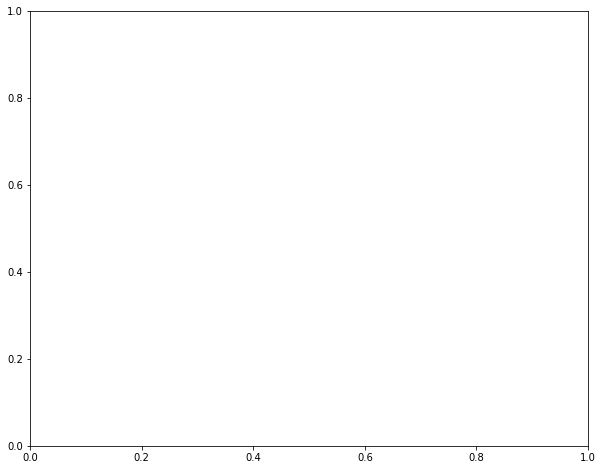

In [63]:
fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(10,8))

ax.plot(focus.index, focus['cum confirmed'], label='Total confirmed')
ax.plot(focus.index, focus['current suspected'], label='Suspected untested')
# ax.plot(focus.index, focus['new confirmed'] - focus['cum sus to tomorrow'] * 0.3, label='brand new confirm')

ax.plot(focus.index, focus['cum confirmed'] + 0.5 * focus['current suspected'], label='Total confimed + 50% suspected untested', ls='--' )
ax.plot(focus.index, focus['cum confirmed'] + focus['current suspected'], label='Total confimed + 100% suspected untested', ls='--' )
# ax.set_yscale('log')
ax.tick_params(labelrotation=90)
ax.legend()

---

In [47]:
focus = df.iloc[9:,[10,11,12]].copy()
focus['cum released'] = focus['cum on medical observation'] - focus['current on medical observation']
focus

,current on medical observation,today released,cum on medical observation,cum released
time,,,,
1/19/2020,90.0,NaN,817.0,727.0
1/20/2020,922.0,NaN,1739.0,817.0
1/21/2020,1394.0,NaN,2197.0,803.0
1/22/2020,4928.0,NaN,5897.0,969.0
1/23/2020,8420.0,NaN,9507.0,1087.0
1/24/2020,13967.0,NaN,15197.0,1230.0
1/25/2020,21556.0,325.0,23431.0,1875.0
1/26/2020,30453.0,583.0,32799.0,2346.0
1/27/2020,44132.0,914.0,47833.0,3701.0


---

In [8]:
focus = df.iloc[11:,[0,1,8,9]].copy()
focus['cum suspected'] = np.append([np.nan, 393], focus['new suspected'].values[2:] + focus['current suspected'].values[1:-1])
focus['today tested'] = focus['cum suspected'] - focus['current suspected']
focus['positive rate'] = focus['new confirmed'] / focus['today tested']
# focus['today positive ratio'] = np.append([np.inf], focus['new confirmed'][:-1].values / focus['today tested'][1:].values)

# focus['cum suspected'] = t.cumsum()
# focus['today tested'] = focus['cum suspected'] - focus['current suspected']
# focus['today positive ratio'] = focus['new confirmed'] / focus['today tested']
focus

,new confirmed,cum confirmed,new suspected,current suspected,cum suspected,today tested,positive rate
time,,,,,,,
1/21/2020,149.0,440,NaN,NaN,NaN,NaN,NaN
1/22/2020,131.0,571,257.0,393.0,393.0,0.0,inf
1/23/2020,259.0,830,680.0,1072.0,1073.0,1.0,259.000000
1/24/2020,444.0,1287,1118.0,1965.0,2190.0,225.0,1.973333
1/25/2020,688.0,1975,1309.0,2684.0,3274.0,590.0,1.166102
1/26/2020,769.0,2744,3806.0,5794.0,6490.0,696.0,1.104885
1/27/2020,1771.0,4515,2077.0,6973.0,7871.0,898.0,1.972160
1/28/2020,1459.0,5974,3248.0,9239.0,10221.0,982.0,1.485743
1/29/2020,1737.0,7711,4148.0,12167.0,13387.0,1220.0,1.423770


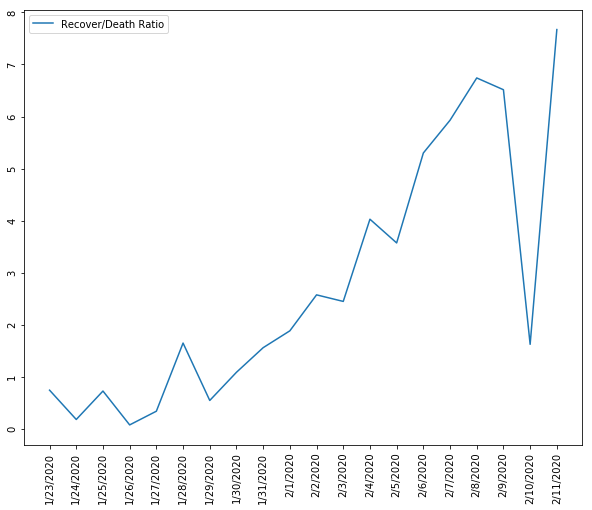

In [6]:
focus = df.iloc[11:,].copy()

fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(10,8))

ax.plot(focus.index, focus['new recovered'] / focus['new death'], label='Recover/Death Ratio')
ax.tick_params(labelrotation=90)
ax.legend()

---

# Medical Observation

In [3]:
focus = df[['current on medical observation','today released','cum on medical observation']].copy().fillna(0)
focus = focus.iloc[9:,]
focus['cum released'] = focus['cum on medical observation'] - focus['current on medical observation']
focus.columns = ['stock','new out','cum in','cum out']
focus['new in'] = np.append([np.nan],(focus['stock'] + focus['new out']).values[1:] - focus['stock'].values[:-1])
focus.tail()

,stock,new out,cum in,cum out,new in
time,,,,,
3/8/2020,20146.0,3802.0,674760.0,654614.0,874.0
3/9/2020,16982.0,4148.0,675338.0,658356.0,984.0
3/10/2020,14607.0,3235.0,675886.0,661279.0,860.0
3/11/2020,13701.0,2206.0,677243.0,663542.0,1300.0
3/12/2020,12161.0,2483.0,678088.0,665927.0,943.0


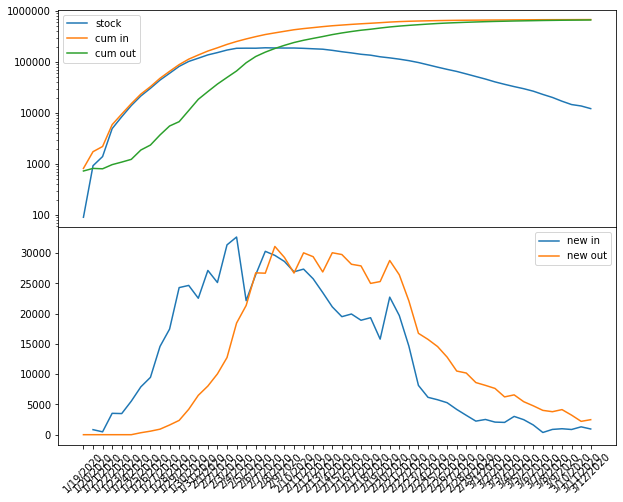

In [4]:
fig, ax=plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10,8))
fig.subplots_adjust(hspace=0)

for i in ['stock','cum in','cum out']:
    ax[0].plot(focus.index, focus[i], label=i)
ax[0].set_yscale('log')
# ax[0].tick_params(labelrotation=90)
ax[0].legend()
ax[0].yaxis.set_major_formatter(ScalarFormatter())

for i in ['new in','new out']:
    ax[1].plot(focus.index, focus[i], label=i)
# ax[1].set_yscale('log')
# ax[1].tick_params(labelrotation=90)
ax[1].legend()
ax[1].yaxis.set_major_formatter(ScalarFormatter())
plt.xticks(rotation=45)
plt.show()

---

In [81]:
from scipy import stats

def ts_dynamics(ts, days, label):
    fig, ax=plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10,6))
    ax.set_yscale('log')
    ax.scatter(ts.index, ts, s=4, c='gray', label=label)
    ax.xaxis.set_major_locator(plt.MaxNLocator(17))
    ax.tick_params(labelrotation=90, labelsize=14)
    ax.legend()
    
    for a, b in days:
        slope, intercept, _,_,_ = stats.linregress(np.arange(a,b),np.log(ts[a:b].values))
        x = np.arange(a,b)
        y = np.exp(slope*x + intercept)
        ax.plot(x, y)
        ax.annotate(np.round(np.exp(slope),2), xy=((a+b-2)/2,np.exp(slope*(a+b-2)/2+intercept)), fontsize=14)

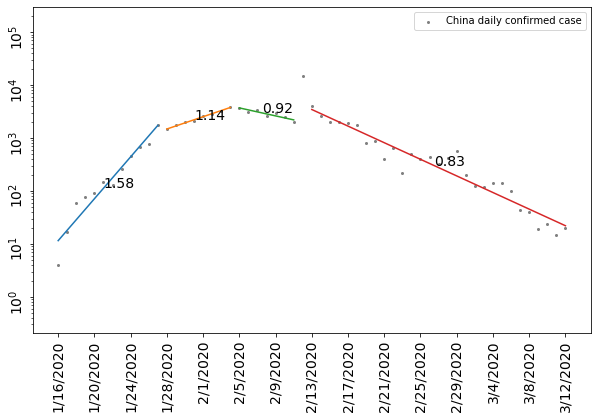

In [84]:
confirm = df['cum confirmed include clinical'].copy()
new = confirm - confirm.shift(1)
new = new[6:]

ts_dynamics(new, [(0,12),(12,20),(20,27),(28,57)], 'China daily confirmed case')

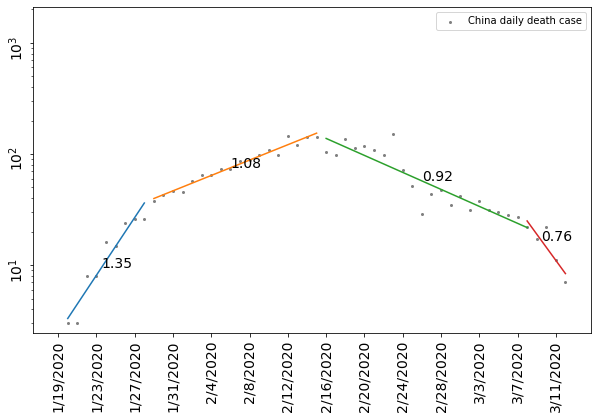

In [124]:
confirm = df['cum death including from clinical'].copy()
new = confirm - confirm.shift(1)
new = new[9:]

ts_dynamics(new, [(1,10),(10,28),(28,50),(49,54)], 'China daily death case')

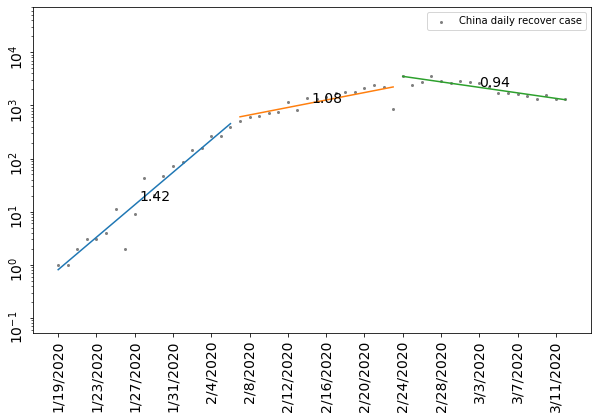

In [125]:
confirm = df['cum recovered'].copy()
new = confirm - confirm.shift(1)
new = new[9:]

ts_dynamics(new, [(0,19),(19,36),(36,54)], 'China daily recover case')

ax.tick_params(labelsize=20)

In [2]:
import matplotlib.dates as mdates
wh = pd.read_clipboard(header=None)
wh.index = pd.date_range(start='2020/01/10', end='2020/04/08', freq='1D')

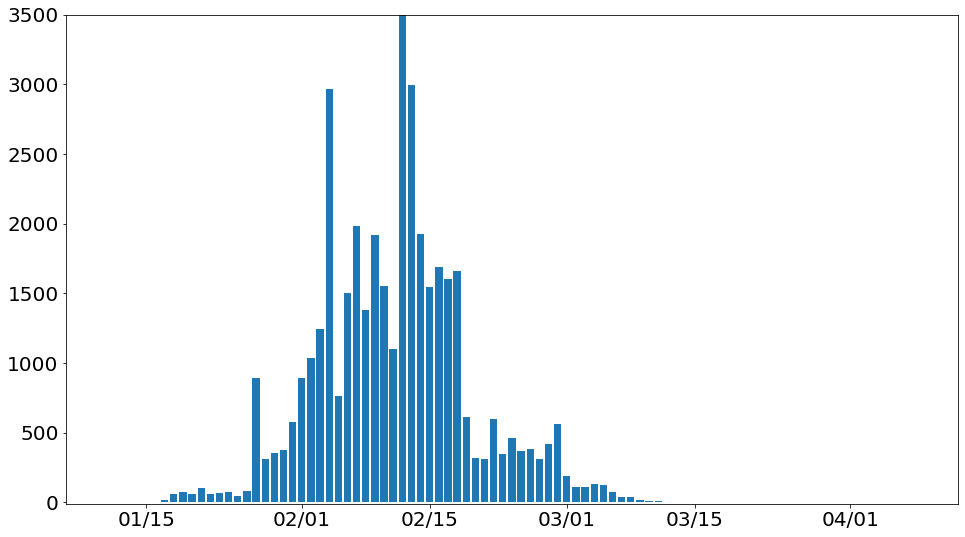

In [29]:
fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(16,9))

# ax.plot(wh.diff(),'o-')
ax.bar(x=wh.index, height=wh.diff()[0])

ax.set_ylim(top=3500, bottom=-10)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
ax.tick_params(labelsize=20)